# Can We Accurately Classify Types of Brain Tumors?

By: Samir Chawla <br>
Original Publication Date: Thursday April 28, 2022

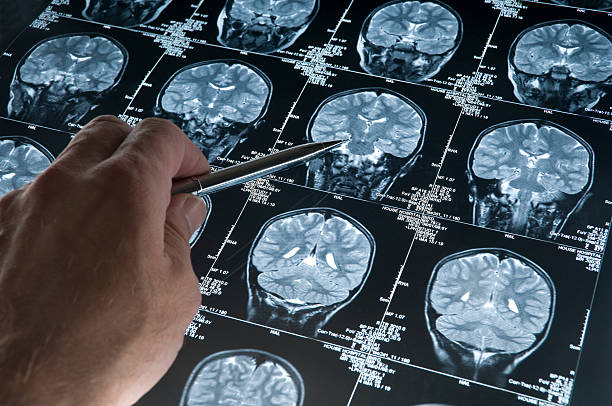

### Background Information

Brain tumors are a devastating illness that affect around 25,000 American adults annually. The prognosis can vary depending on the type and location of the tumor found in the patient. Regardless of the classification of the tumor a prompt diagnosis of the condition can increase the likelihood of survival. Due to this, oncologists and neurologist from across the globe have rapidly adopted AI solutions to assist in rapidly diagnosing patients to accelerate them on their treatment path.

In this project I will attempt to create an AI classifier for different types of brain tumors using MRI images. MRI imaging is usually the diagnostic tool used by neurologists to detect for the brain for anomalies including tumors. An MRI image can detect the size, location and whether the tumor is or is not malignant.

### Different Type of Tumors

Here are the different classifications of brain tumors that we will be identifying:

**Glioma:** These tumors are one of the most common and can be the most lethal due to them often being malignant.  They can occur anywhere around the brain or spinal tissue.

**Meningioma:** These tumors are less lethal gliomas because there is higher chance these tumors would be benign. They are more in women and can grow for years before being detected.

**Pituitary:** These are benign tumors located on or around the pituitary gland and can also cause hormonal imbalances.

### Import Libraries

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

# Tensorflow Model Architecture Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation

### Initialize Basic Objects

In [88]:
# Load the train and test images from the seperate folders

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
image_size = 256
image_shape = (image_size, image_size)

# Set the paths
traindir =  r"C:\Users\samir\Desktop\Capstone Projects\Brain Tumor Classifier\Raw Data\Training"
testdir = r"C:\Users\samir\Desktop\Capstone Projects\Brain Tumor Classifier\Raw Data\Testing"

# Initialize training and testing dataframes
train_df = pd.DataFrame(columns=['image', 'label'])
test_df = pd.DataFrame(columns=['image', 'label'])

### Load the Tumor Image Data 

In [90]:
# Load training dataset
cr = 0
for label in labels:
    path = os.path.join(traindir, label)
    for img in os.listdir(path):
        train_img = cv2.imread(os.path.join(path,img))
        train_img = cv2.resize(train_img,(image_shape))
        train_df.at[cr,'image']= train_img
        train_df.at[cr,'label'] = label
        cr = cr + 1

# Load testing dataset
cr = 0
for label in labels:
    path = os.path.join(testdir, label)
    for img in os.listdir(path):
        test_img = cv2.imread(os.path.join(path,img))
        test_img = cv2.resize(test_img,(image_shape))
        test_df.at[cr,'image']= test_img
        test_df.at[cr,'label'] = label
        cr = cr + 1

### Scale Image Data

In [91]:
# Convert train_imgs and test_imgs into arrays
train_imgs = np.asarray(train_df['image'].tolist())
test_imgs = np.asarray(test_df['image'].tolist())

# Scale images
train_imgs = train_imgs/255.0  
test_imgs = test_imgs/255.0

### One Hot Encode Tumor Labels

In [92]:
# One hot encode training data
for label in labels:
    train_df[label] = np.where(train_df['label'].isin([label]),1,0)
    
# One hot encode testing data
for label in labels:
    test_df[label] = np.where(test_df['label'].isin([label]),1,0)

# Copy original label
label_df = train_df.loc[:,'label']

# Drop old label columns
train_df = train_df.drop(columns ='label')
test_df = test_df.drop(columns ='label')

# Create train_labels and test_labels
train_labels = train_df.iloc[:,1:5]
test_labels = test_df.iloc[:,1:5]

### View Sample Images

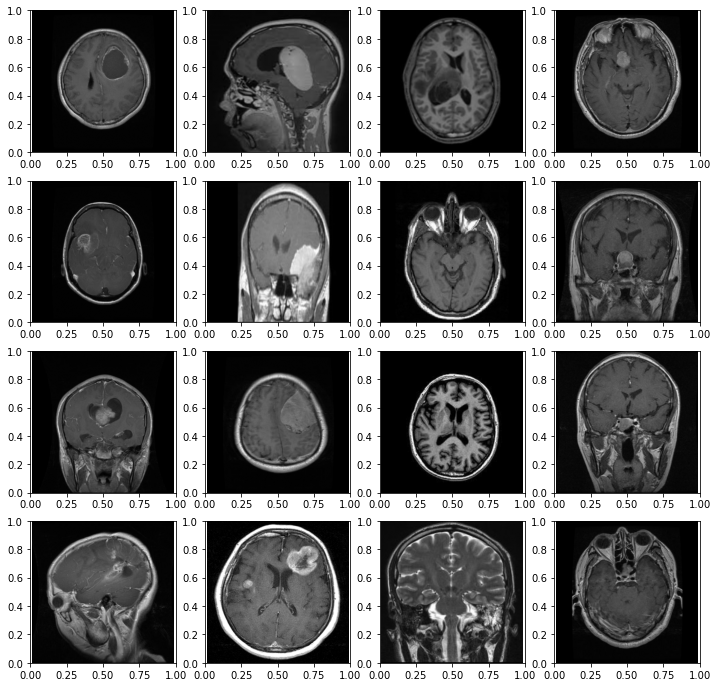

In [161]:
columns = 4
rows = len(labels)

fig, axs = plt.subplots(rows, columns, figsize=(12, 12))
cr=1
for r in range(1, rows+1):
    for c in range(1, columns+1):
        found_img = False
        while found_img==False:
            num = np.random.randint(len(train_imgs))
            if label_df[num] == labels[c-1]:
                fig.add_subplot(rows, columns, cr)
                plt.axis('off')
                plt.imshow(train_imgs[num])
                cr=cr+1
                found_img = True
plt.show()            

### Design the Model

In [8]:
# Build or Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))     
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  
model.add(Flatten())
model.add(Dense(32))
#model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(4))
model.add(Activation('softmax'))

# Compile and print our Model
model.compile(loss = "categorical_crossentropy", optimizer='Adam', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_8 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 123, 123, 32)      9248      
                                                      

### Train the Model

In [9]:
history = model.fit(train_imgs, train_labels, batch_size = 256, epochs = 40, verbose=1)

Epoch 1/40
12/12 [==============================] - 16s 337ms/step - loss: 1.2714 - acc: 0.4314
Epoch 2/40
12/12 [==============================] - 3s 288ms/step - loss: 0.9674 - acc: 0.5913
Epoch 3/40
12/12 [==============================] - 3s 288ms/step - loss: 0.8429 - acc: 0.6589
Epoch 4/40
12/12 [==============================] - 3s 288ms/step - loss: 0.6918 - acc: 0.7129
Epoch 5/40
12/12 [==============================] - 3s 288ms/step - loss: 0.5399 - acc: 0.7885
Epoch 6/40
12/12 [==============================] - 3s 287ms/step - loss: 0.4703 - acc: 0.8174
Epoch 7/40
12/12 [==============================] - 3s 290ms/step - loss: 0.4042 - acc: 0.8314
Epoch 8/40
12/12 [==============================] - 3s 288ms/step - loss: 0.3189 - acc: 0.8693
Epoch 9/40
12/12 [==============================] - 3s 289ms/step - loss: 0.2903 - acc: 0.8871
Epoch 10/40
12/12 [==============================] - 4s 292ms/step - loss: 0.2306 - acc: 0.9098
Epoch 11/40
12/12 [=============================

### Plot Training Results

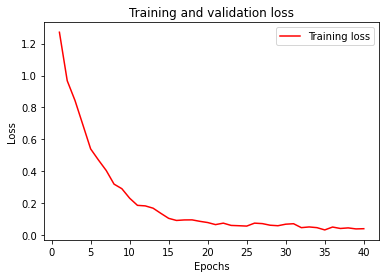

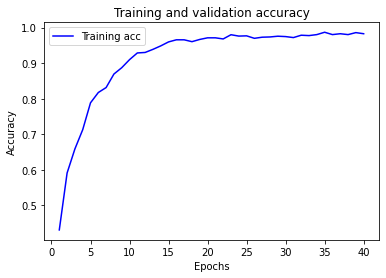

In [10]:
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss', color='red')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
#val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc', color='blue')
#plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate the Model on Test Data

In [11]:
predictions = model.evaluate(test_imgs, test_labels)

13/13 [==============================] - 1s 24ms/step - loss: 6.1222 - acc: 0.7741


With 77% accuracy the model is sufficient to attain a positive expectantcy of correct predictions but could be improved with adjusting batch size as well as increasing the dimensions of the image all of which come at a cost of RAM and training speed. With greater resources the accuracy could definitly be improved to an accuracy percentage to the mid 80 percentage.

### Conclusion

This model was able to demonstrate with the use of AI could have in the medical diagnostic field from detecting tumors and other abnormalities inside the body. Professionals in the field have already started utilizing AI in their practice and we should expect this continue as quantity of data increases as well as the awareness for this technology.

### References

^https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri  (Dataset Source)

^https://www.cancer.net/cancer-types/brain-tumor/statistics#:~:text=Brain%20tumors%20account%20for%2085,year%20in%20the%20United%20States.

^https://www.hopkinsmedicine.org/health/conditions-and-diseases/gliomas#:~:text=Glioma%20is%20a%20common%20type,astrocytes%2C%20oligodendrocytes%20and%20ependymal%20cells.

^https://www.hopkinsmedicine.org/health/conditions-and-diseases/meningioma

^https://www.hopkinsmedicine.org/neurology_neurosurgery/centers_clinics/pituitary_center/

### Special Acknowledgements

As someone who has lost a loved one to a brain tumor I just want to recognize that every image that is positive for a tumor represents a human being that is in a fight for their life and we should all take a moment to respect their courage and bravery on their journey. Receiving a brain tumors diagnosis can be a frightening experience and hopefully with new advances in medicine and AI can save lives in the future. 

To learn more about brain tumors and to make a donation please visit: https://braintumor.org